#### Group Member: Jeffery Zhang, Oliver Liu, Zhe Zhou

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

* Some of the columns contain lists and dictionaries. Extract information you need and reformat them.

In [5]:
raw_data_movies = pd.read_csv("tmdb_5000_movies.csv")

In [6]:
raw_data_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
raw_data_movies["genres"] = raw_data_movies["genres"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["keywords"] = raw_data_movies["keywords"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_companies"] = raw_data_movies["production_companies"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["production_countries"] = raw_data_movies["production_countries"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_movies["spoken_languages"] = raw_data_movies["spoken_languages"].apply(lambda x : [i["name"] for i in eval(x)])

In [8]:
raw_data_credits = pd.read_csv("tmdb_5000_credits.csv")

In [9]:
raw_data_credits["cast"] = raw_data_credits["cast"].apply(lambda x : [i["name"] for i in eval(x)])
raw_data_credits["crew"] = raw_data_credits["crew"].apply(lambda x : [i["job"] + " : " + i["name"] for i in eval(x)])

In [10]:
raw_data = pd.merge(raw_data_movies, raw_data_credits.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)

* Clean the dataset, remove the outliers, before any data analysis. Explain what you did.

In [11]:
data = raw_data[(raw_data["budget"] > 0) &
                (raw_data["original_title"] is not np.nan) &
                (raw_data["popularity"] > 0) & 
                (raw_data["production_companies"].apply(len) != 0) &
                (raw_data["production_countries"].apply(len) != 0) & 
                (raw_data["release_date"] is not np.nan) &
                (raw_data["revenue"] > 0) &
                (raw_data["runtime"] > 0) &
                (raw_data["cast"].apply(len) != 0) & 
                (raw_data["crew"].apply(len) != 0)]

In [12]:
data['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4773    1994-09-13
4788    1972-03-12
4792    1997-11-06
4796    2004-10-08
4798    1992-09-04
Name: release_date, Length: 3183, dtype: object

In [53]:
import datetime
import calendar
days = []
for date in data['release_date']:
    day = calendar.day_name[datetime.datetime.strptime(date, '%Y-%m-%d').weekday()]
    days.append(day)
data.release_day_of_week = days
data
groupby_day = data.groupby('release_day_of_week').budget.count()
print(groupby_day.sort_values())


release_day_of_week
Sunday        112
Saturday      129
Monday        157
Tuesday       223
Wednesday     593
Thursday      665
Friday       1304
Name: budget, dtype: int64


In [54]:
data.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.012717,0.427822,0.703984,0.226795,-0.034135,0.537224
id,0.012717,1.000000,0.178044,0.029373,-0.033730,-0.064647,0.106548
popularity,0.427822,0.178044,1.000000,0.599706,0.179201,0.286779,0.747323
revenue,0.703984,0.029373,0.599706,1.000000,0.231085,0.187030,0.754761
runtime,0.226795,-0.033730,0.179201,0.231085,1.000000,0.382346,0.255873
vote_average,-0.034135,-0.064647,0.286779,0.187030,0.382346,1.000000,0.379500
vote_count,0.537224,0.106548,0.747323,0.754761,0.255873,0.379500,1.000000


<AxesSubplot:>

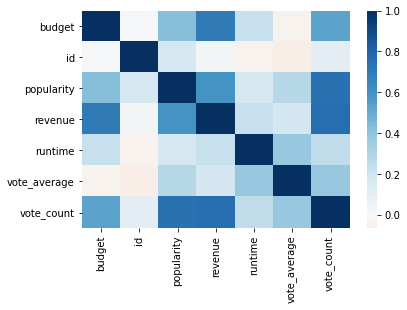

In [55]:
sns.heatmap(data.corr(), cmap='RdBu', center=0)

In [60]:
groupby_day_rev = data.groupby('release_day_of_week').revenue.agg(['count', 'median'])
print(groupby_day_rev.sort_values('median'))

                     count      median
release_day_of_week                   
Saturday               129  41158757.0
Friday                1304  42185535.5
Sunday                 112  44367120.5
Monday                 157  49469904.0
Tuesday                223  68896829.0
Thursday               665  77000000.0
Wednesday              593  86658558.0


By ranking, we see budget is the most correlated with revenue, followed by popularity and vote count.
Runtime is not very strongly correlated with revenue.
Correlation with vote average is suprisingly low.
Correlation with id is, as expected, very low.

In [61]:
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_day_of_week
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Editor : Stephen E. Rivkin, Production Design...",Thursday
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Director of Photography : Dariusz Wolski, Dir...",Saturday
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Original Music Composer : Thomas Newman, Dire...",Monday
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Original Music Composer : Hans Zimmer, Produc...",Monday
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Screenplay : Andrew Stanton, Director : Andre...",Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,[Comedy],http://www.miramax.com/movie/clerks/,2292,"[salesclerk, loser, aftercreditsstinger]",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[Miramax Films, View Askew Productions]",...,92.0,[English],Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,"[Brian O'Halloran, Jeff Anderson, Jason Mewes,...","[Director : Kevin Smith, Screenplay : Kevin Sm...",Tuesday
4788,12000,"[Horror, Comedy, Crime]",NaN,692,"[gay, trailer park, pop culture, drug dealer, ...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,[Dreamland Productions],...,93.0,[English],Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Divine, David Lochary, Mary Vivian Pearce, Mi...","[Director : John Waters, Screenplay : John Wat...",Sunday
4792,20000,"[Crime, Horror, Mystery, Thriller]",NaN,36095,"[japan, prostitute, hotel, based on novel, hal...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,[Daiei Studios],...,111.0,[日本語],Released,Madness. Terror. Murder.,Cure,7.4,63,"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki...","[Director : Kiyoshi Kurosawa, Writer : Kiyoshi...",Thursday
4796,7000,"[Science Fiction, Drama, Thriller]",http://www.primermovie.com,14337,"[distrust, garage, identity crisis, time tra

In the process of cleaning the data, the outliers that are caused by artifacts have to be removed. The purpose of this project is to build the model of predicting the revenue of movies, so the values of budget and revenue are not supposed to be zero. Also, the runtime of the movies cannot be zero because it does not make sense. In addition, the columns, "original_title", "cast", and "crew", are necessary since they demonstrate the convincingness of the data. Furthermore, in the other columns, "production_companies" and "production_countries", all these data are required in the model that we are going to build. And now, we are able to begin our data analysis.